# Pixel Manipulation

In [2]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [18]:
# Helper function to display multiple color images in a plot
def display_color_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c])
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()

### Part 1

In [3]:
def most_frequent_color(im):
    if len(im.shape) == 3:
        u, c = np.unique(im.reshape([1, -1, 3]), axis = 1, return_counts=True)
        t = list(zip(c, u[0]))
        t = sorted(t, key = lambda x : x[0])
        return t[len(t) - 1][1]
    else:
        print("Grayscale image doesn't make sense here!")

In [4]:
img = cv2.cvtColor(cv2.imread('../input_data/fg.jpg'), cv2.COLOR_BGR2RGB)
color = most_frequent_color(img)
print("Most frequent color in image is ", str(color))

Most frequent color in image is  [ 21 255   8]


### Part 2

In [5]:
def mergeImage(fg, bg):
    threshold = 210
    color = most_frequent_color(fg)
    fg = fg.astype(np.float64)
    bg = bg.astype(np.float64)
    img = np.zeros(fg.shape)
    for i in range(len(fg)):
        for j in range(len(fg[0])):
            if abs(fg[i][j][0] - color[0]) + abs(fg[i][j][1] - color[1]) + abs(fg[i][j][2] - color[2]) <= threshold:
                img[i][j] = bg[i][j]
            else:
                img[i][j] = fg[i][j]
    return img.astype(np.uint8)

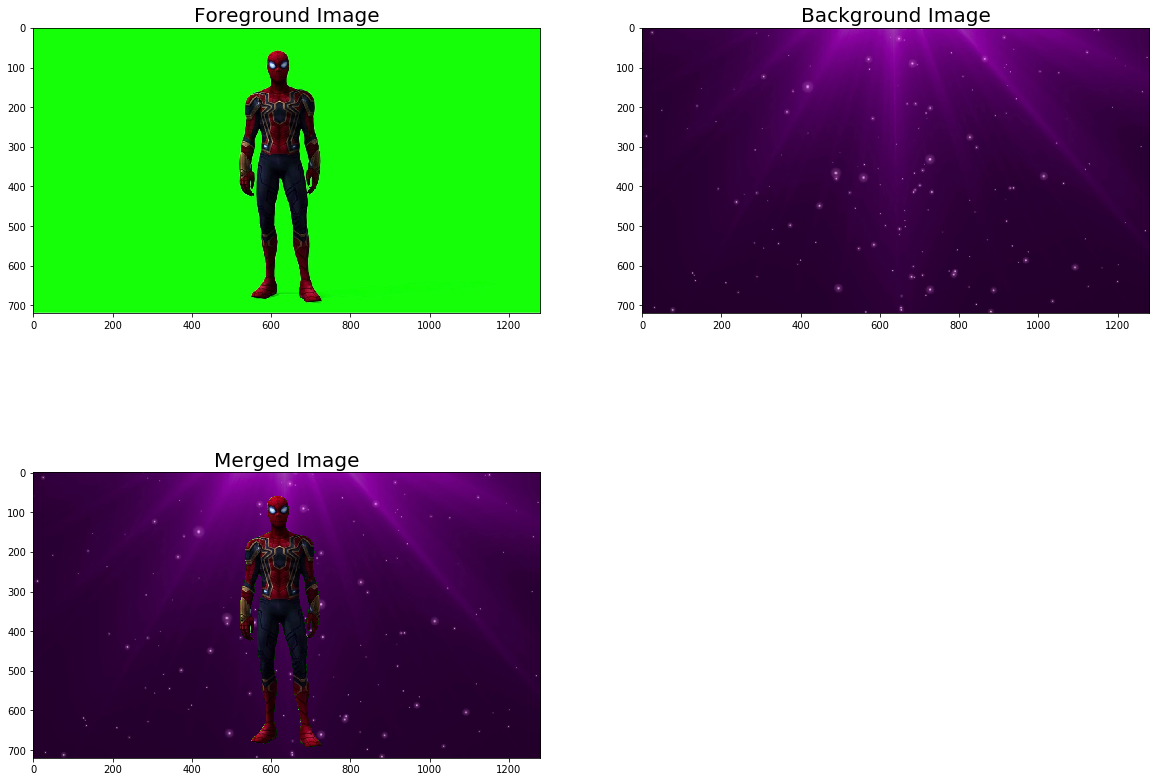

In [19]:
fg = cv2.cvtColor(cv2.imread('../input_data/fg.jpg'), cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(cv2.imread('../input_data/bg.jpg'), cv2.COLOR_BGR2RGB)
images = []
images.append(fg)
images.append(bg)
images.append(mergeImage(fg, bg))
display_color_images(images, 2, 2, (20, 15), 'Chroma-Key', ['Foreground Image', 'Background Image', 'Merged Image'])

### Part 3